<a href="https://colab.research.google.com/github/madhurasharan/Sentimental-Analysis-on-movie-reviews/blob/main/Sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np

In [16]:
train=pd.read_csv("/content/train.csv")
print(train)


                                                  movieid  \
0                                        marvelous_pirate   
1               tony_montana_frodo_baggins_v_rocky_balboa   
2       darth_vader_katniss_everdeen_sorcerer_donnie_d...   
3                                      lara_croft_glimmer   
4       jason_bourne_surreal_the_terminator_indiana_jones   
...                                                   ...   
162753  the_joker_ethereal_captain_jack_sparrow_fantastic   
162754  e.t._hannibal_lecter_vito_corleone_katniss_eve...   
162755                     infinite_enigma_luke_skywalker   
162756                  emerald_oracle_iron_man_wolverine   
162757         james_t._kirk_phenomenal_zephyr_chronicles   

               reviewerName  isFrequentReviewer  \
0            Benjamin Henry               False   
1             Felicia Lopez               False   
2       Mr. Charles Burgess                True   
3              Ryan Barrett               False   
4          A

In [17]:
train.shape

(162758, 5)

In [18]:
train.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment'],
      dtype='object')

In [19]:
train.isnull().sum()

,0
movieid,0
reviewerName,0
isFrequentReviewer,0
reviewText,6447
sentiment,0


**Load movies data**

*It is a metadata for train data*

In [20]:
movies=pd.read_csv("/content/movies.csv")
print(movies)

                                                  movieid  \
0                       han_solo_heroic_myth_wonder_woman   
1                   voyage_tyler_durden_han_solo_stardust   
2       norman_bates_ferris_bueller_hermione_granger_v...   
3                                elegant_hermione_granger   
4                                  adventure_rocky_balboa   
...                                                   ...   
143253                 sherlock_holmes_surreal_james_bond   
143254                mr._miyagi_katniss_everdeen_harmony   
143255               elegant_emerald_valiant_donnie_darko   
143256                     wonder_hermione_granger_hulk_v   
143257                                  lara_croft_voyage   

                                                    title  audienceScore  \
0                       Han Solo Heroic Myth Wonder Woman           50.0   
1                   Voyage Tyler Durden Han Solo Stardust            NaN   
2       Norman Bates Ferris Bueller Her

In [21]:
movies.shape


(143258, 14)

In [22]:
movies.columns

Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

In [23]:
movies.isnull().sum()

,0
movieid,0
title,0
audienceScore,70010
rating,129267
ratingContents,129267
releaseDateTheaters,112485
releaseDateStreaming,63838
runtimeMinutes,13827
genre,11083
originalLanguage,13858


In [24]:
#extracting unique columns from movies.csv(taking only the first occurance of each movie_id)
movies_unique = movies[movies.groupby('movieid').cumcount() == 0]

# Perform a left merge with the first match for each movie_id
train_data = pd.merge(train, movies_unique, on='movieid', how='left')
train_data

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE,The Joker Ethereal Captain Jack Sparrow Fantastic,NaN,NaN,NaN,NaN,2004-01-06,96.0,Romance,English,Gertrude Fonner,NaN,NaN,NaN
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE,E.T. Hannibal Lecter Vito Corleone Katniss Eve...,20.0,PG-13,"['Crude and Sexual Content', 'Brief Strong Lan...",2016-02-12,2016-05-24,102.0,"Comedy, Adventure",English,Susan Oley,$28.8M,Paramount Pictures,NaN
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE,Infinite Enigma Luke Skywalker,78.0,PG-13,"['Some Language', 'Suggestive References']",NaN,2022-06-17,90.0,"Comedy, Drama",English,Bryant Reams,NaN,NaN,Dolby Digital
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE,Emerald Oracle Iron Man Wolverine,39.0,NaN,NaN,1996-11-16,1998-11-03,88.0,"Kids & family, Holiday, Comedy",English,Lisa Cruz,$60.6M,20th Century Fox,Surround


# EDA

In [25]:
train_data.shape

(162758, 18)

In [26]:
train_data.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

In [27]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
audienceScore,149510.0,65.214541,19.937695,0.0,51.0,68.0,82.0,100.0
runtimeMinutes,159382.0,106.911828,22.138131,4.0,93.0,104.0,118.0,561.0


In [28]:
train_data.describe(include='object').T

,count,unique,top,freq
movieid,162758,16812,escape_the_terminator_tyler_durden_astonish,708
reviewerName,162758,4482,Sherri Morrison,962
reviewText,156311,155071,Parental Content Review,29
sentiment,162758,2,POSITIVE,108761
title,162758,16812,Escape The Terminator Tyler Durden Astonish,708
rating,99034,7,R,50331
ratingContents,99034,4477,['Language'],2322
releaseDateTheaters,126924,4226,2019-11-01,459
releaseDateStreaming,146573,2899,2017-05-22,653
genre,160320,1162,Drama,24159


In [29]:
train_data.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


In [30]:
train_data.tail()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE,The Joker Ethereal Captain Jack Sparrow Fantastic,NaN,NaN,NaN,NaN,2004-01-06,96.0,Romance,English,Gertrude Fonner,NaN,NaN,NaN
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE,E.T. Hannibal Lecter Vito Corleone Katniss Eve...,20.0,PG-13,"['Crude and Sexual Content', 'Brief Strong Lan...",2016-02-12,2016-05-24,102.0,"Comedy, Adventure",English,Susan Oley,$28.8M,Paramount Pictures,NaN
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE,Infinite Enigma Luke Skywalker,78.0,PG-13,"['Some Language', 'Suggestive References']",NaN,2022-06-17,90.0,"Comedy, Drama",English,Bryant Reams,NaN,NaN,Dolby Digital
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE,Emerald Oracle Iron Man Wolverine,39.0,NaN,NaN,1996-11-16,1998-11-03,88.0,"Kids & family, Holiday, Comedy",English,Lisa Cruz,$60.6M,20th Century Fox,Surround
162757,james_t._kirk_phenomenal_zephyr_chronicles,Howard Evans,False,A peerless exercise in stimulus response.,POSITIVE,James T. Kirk Phenomenal Zephyr Chronicles,57.0,R,['Language'],2009-10-16,2009-12-29,86.0,"Horror, Mystery & thriller",English,Philip Stuck,$107.9M,Paramount Pictures,NaN


In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               162758 non-null  object 
 1   reviewerName          162758 non-null  object 
 2   isFrequentReviewer    162758 non-null  bool   
 3   reviewText            156311 non-null  object 
 4   sentiment             162758 non-null  object 
 5   title                 162758 non-null  object 
 6   audienceScore         149510 non-null  float64
 7   rating                99034 non-null   object 
 8   ratingContents        99034 non-null   object 
 9   releaseDateTheaters   126924 non-null  object 
 10  releaseDateStreaming  146573 non-null  object 
 11  runtimeMinutes        159382 non-null  float64
 12  genre                 160320 non-null  object 
 13  originalLanguage      159468 non-null  object 
 14  director              162758 non-null  object 
 15  

In [32]:
train_data.isnull().sum()

,0
movieid,0
reviewerName,0
isFrequentReviewer,0
reviewText,6447
sentiment,0
title,0
audienceScore,13248
rating,63724
ratingContents,63724
releaseDateTheaters,35834


In [33]:
#check how many records are positive and negative
sentiment_counts = train_data['sentiment'].value_counts()
sentiment_counts

,count
sentiment,
POSITIVE,108761
NEGATIVE,53997


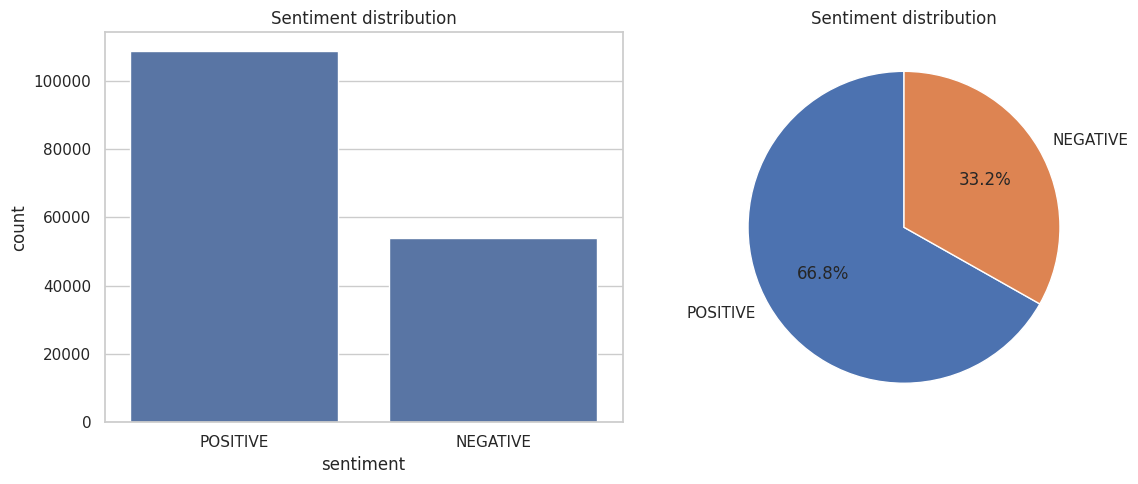

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot count plot
sns.countplot(x='sentiment', data=train_data, ax=axes[0])
axes[0].set_title("Sentiment distribution")

# Plot pie chart
sentiment_counts = train_data['sentiment'].value_counts()
axes[1].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Sentiment distribution")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [35]:
train_data['audienceScore']=train_data['audienceScore']
train_data['audienceScore'].isnull().sum()

np.int64(13248)

In [36]:
train_data['audienceScore']=train_data['audienceScore'].fillna(train_data['audienceScore'].mean())
train_data['audienceScore'].isnull().sum()

np.int64(0)

In [37]:
train_data['runtimeMinutes']=train_data['runtimeMinutes'].fillna(train_data['runtimeMinutes'].mean())
train_data['runtimeMinutes'].isnull().sum()

np.int64(0)

In [38]:
# # reshape it into 2D array
# #Scikit-learn's models and transformers typically expect input data to be in the form
# #of a 2D array or matrix.
audience_Score = train_data['audienceScore'].values.reshape(-1, 1)
runtime_Minutes = train_data['runtimeMinutes'].values.reshape(-1, 1)

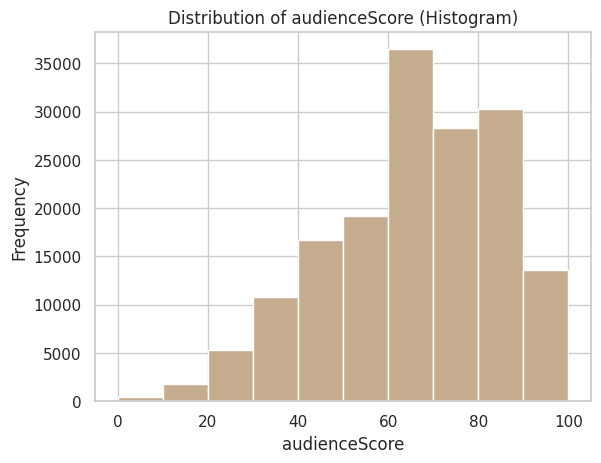

In [39]:
import matplotlib.pyplot as plt

#Histogram
plt.hist(train_data['audienceScore'], color='#c6ac8f')
plt.title('Distribution of audienceScore (Histogram)')
plt.xlabel('audienceScore')
plt.ylabel('Frequency')
plt.show()

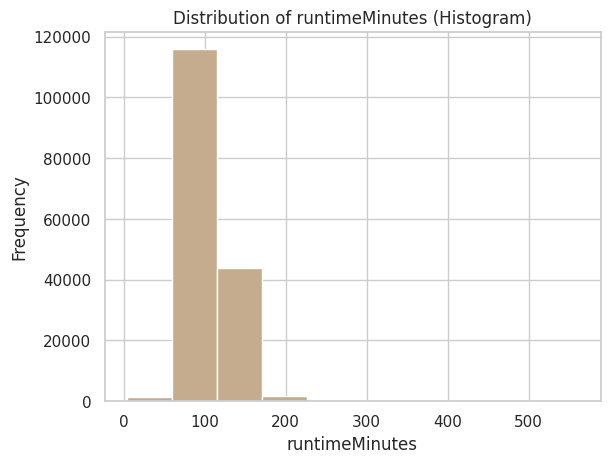

In [40]:
#Histogram
plt.hist(train_data['runtimeMinutes'], color='#c6ac8f')
plt.title('Distribution of runtimeMinutes (Histogram)')
plt.xlabel('runtimeMinutes')
plt.ylabel('Frequency')
plt.show()

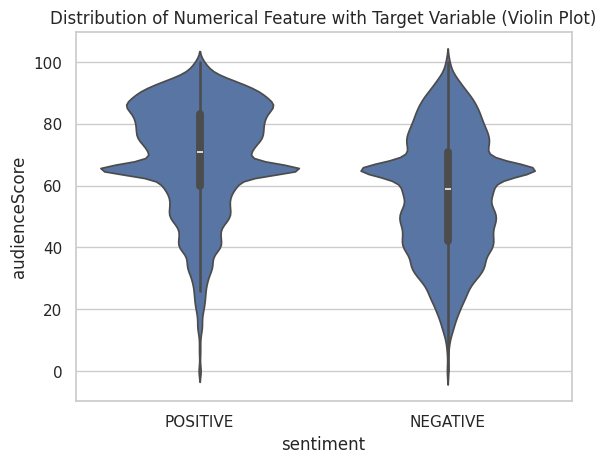

In [41]:
import seaborn as sns

#violonPlot
sns.violinplot(x='sentiment', y='audienceScore', data=train_data)
plt.title('Distribution of Numerical Feature with Target Variable (Violin Plot)')
plt.show()

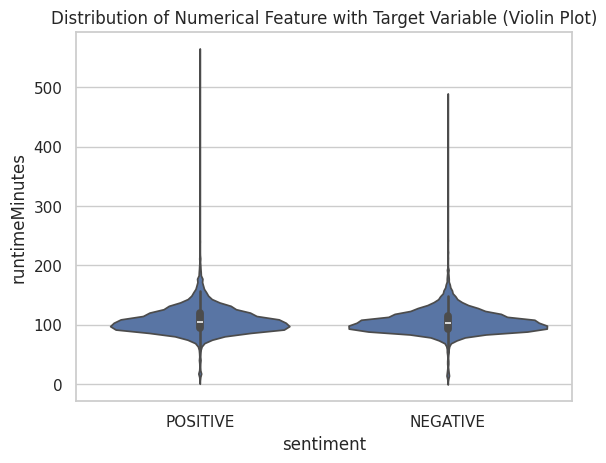

In [42]:
#violonPlot
sns.violinplot(x='sentiment', y='runtimeMinutes', data=train_data)
plt.title('Distribution of Numerical Feature with Target Variable (Violin Plot)')
plt.show()

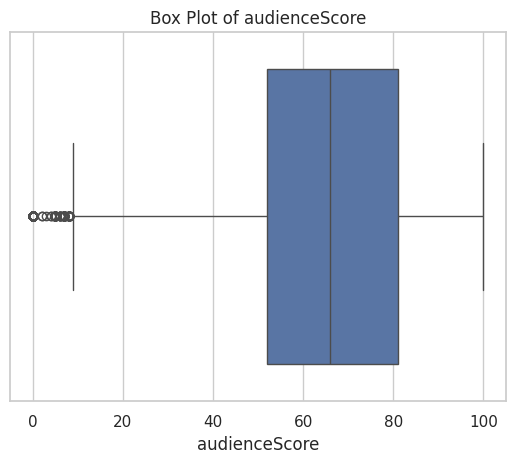

In [43]:
import seaborn as sns

sns.boxplot(x=train_data['audienceScore'])
plt.title('Box Plot of audienceScore')
plt.xlabel('audienceScore')
plt.show()

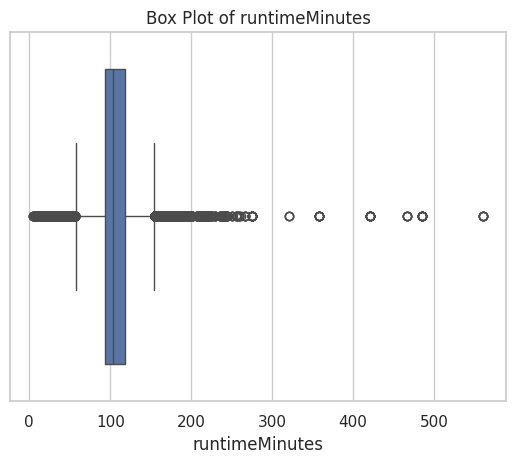

In [44]:
sns.boxplot(x=train_data['runtimeMinutes'])
plt.title('Box Plot of runtimeMinutes')
plt.xlabel('runtimeMinutes')
plt.show()

**Feature scaling**

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform your feature matrix
audience_Score_scaled = scaler.fit_transform(audience_Score)
audience_Score_scaled

array([[0.65      ],
       [0.65214541],
       [0.8       ],
       ...,
       [0.78      ],
       [0.39      ],
       [0.57      ]])

In [46]:
runtime_Minutes_scaled = scaler.fit_transform(runtime_Minutes)
runtime_Minutes_scaled

array([[0.18132855],
       [0.1561939 ],
       [0.22621185],
       ...,
       [0.15439856],
       [0.1508079 ],
       [0.14721724]])

**Handling categorical values**

In [47]:
cat_col=['rating', 'sentiment']
cat_data=train_data[cat_col]
cat_data.isnull().sum()

,0
rating,63724
sentiment,0


In [48]:
cat_data = cat_data.copy()
cat_data['rating'].fillna('Unknown', inplace=True)
cat_data.isnull().sum()

/tmp/ipython-input-48-1471877976.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_data['rating'].fillna('Unknown', inplace=True)


,0
rating,0
sentiment,0


**Visualizing categorical features**

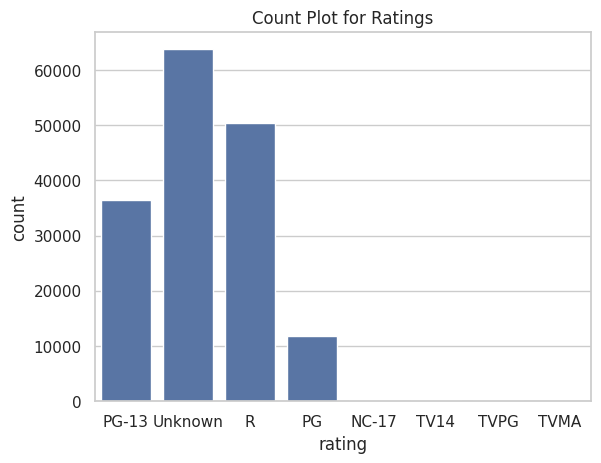

In [49]:
sns.countplot(x='rating', data=cat_data)
plt.title('Count Plot for Ratings')
plt.show()

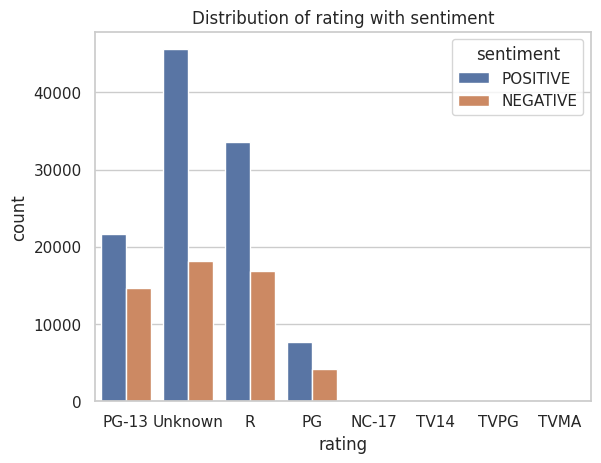

In [50]:
sns.countplot(x='rating', hue='sentiment', data=cat_data)
plt.title(f'Distribution of rating with sentiment')
plt.show()

**Encoding categorical features**

In [51]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'processed_data' is your DataFrame
encoder = OneHotEncoder(handle_unknown='ignore')

# Extract the 'rating' column for one-hot encoding
ratings_column = cat_data[['rating']]

# Apply one-hot encoding
rating_encoded = encoder.fit_transform(ratings_column)
rating_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 162758 stored elements and shape (162758, 8)>

**Text data preprocessing**

In [52]:
train_data['reviewText'].isnull().sum()

np.int64(6447)

In [53]:
train_data['reviewText']=train_data['reviewText'].fillna('')
train_data['reviewText'].isnull().sum()

np.int64(0)

# Data Cleaning:

In [54]:
#lowercasing
def lower_case(reviewText):
    #check if the text is string and then convert to lower case
    if isinstance(reviewText, str):
        return reviewText.lower()
    else:
        return reviewText

train_data['reviewText'] = train_data['reviewText'].apply(lower_case)
train_data['reviewText']

,reviewText
0,henry selick’s first movie since 2009’s corali...
1,with a cast that reads like the vogue oscar pa...
2,creed ii does not give us anything but another...
3,"i know what you're thinking, but this is no li..."
4,director fernando meirelles tells the story wi...
...,...
162753,a top-notch thriller with genuine surprises an...
162754,some people find derek zoolander funny and lik...
162755,"this fun, gentle comedy focuses mainly on them..."
162756,"the film is rescued by a strong third act, but..."


In [55]:
#Remove punctuation and speical characters
import string

def remove_punctuation(reviewText):
    return reviewText.translate(str.maketrans('', '', string.punctuation))

train_data['reviewText'] = train_data['reviewText'].apply(remove_punctuation)
train_data['reviewText']

,reviewText
0,henry selick’s first movie since 2009’s corali...
1,with a cast that reads like the vogue oscar pa...
2,creed ii does not give us anything but another...
3,i know what youre thinking but this is no limi...
4,director fernando meirelles tells the story wi...
...,...
162753,a topnotch thriller with genuine surprises and...
162754,some people find derek zoolander funny and lik...
162755,this fun gentle comedy focuses mainly on theme...
162756,the film is rescued by a strong third act but ...


In [56]:
import re

def remove_urls(reviewText):
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')

    # Use the sub() method to replace URLs with an empty string
    return url_pattern.sub('', reviewText)

train_data['reviewText'] = train_data['reviewText'].apply(remove_urls)


In [57]:
def remove_whitespace(reviewText):
    # Use replace to remove white spaces
    return reviewText.strip('')

train_data['reviewText'] = train_data['reviewText'].apply(remove_whitespace)
train_data['reviewText']

,reviewText
0,henry selick’s first movie since 2009’s corali...
1,with a cast that reads like the vogue oscar pa...
2,creed ii does not give us anything but another...
3,i know what youre thinking but this is no limi...
4,director fernando meirelles tells the story wi...
...,...
162753,a topnotch thriller with genuine surprises and...
162754,some people find derek zoolander funny and lik...
162755,this fun gentle comedy focuses mainly on theme...
162756,the film is rescued by a strong third act but ...


In [58]:
import re

def remove_numbers(reviewText):
    if isinstance(reviewText, str):
        return re.sub(r'\d+', '', reviewText)
    else:
        return reviewText

train_data['reviewText'] = train_data['reviewText'].apply(remove_numbers)

In [59]:
#Tokenization
def tokenize_text(reviewText):
    # Split the review text into words based on whitespace
    words = reviewText.split()
    return words

train_data['reviewText'] = train_data['reviewText'].apply(tokenize_text)

In [60]:
#Handling negative words
def handle_negations(tokens):
    # List of negation words
    negation_words = ['not', 'no', 'never', 'none', 'nobody', 'nowhere']

    # Iterate through tokens and negate the sentiment of the next word after a negation
    negated_tokens = []
    negate = False
    for token in tokens:
        if token.lower() in negation_words:
            negate = True
        elif negate:
            negated_tokens.append('not_' + token)
            negate = False  # Reset negate flag after negating the next word
        else:
            negated_tokens.append(token)

    return negated_tokens

train_data['reviewText'] = train_data['reviewText'].apply(handle_negations)
train_data['reviewText']

,reviewText
0,"[henry, selick’s, first, movie, since, ’s, cor..."
1,"[with, a, cast, that, reads, like, the, vogue,..."
2,"[creed, ii, does, not_give, us, anything, but,..."
3,"[i, know, what, youre, thinking, but, this, is..."
4,"[director, fernando, meirelles, tells, the, st..."
...,...
162753,"[a, topnotch, thriller, with, genuine, surpris..."
162754,"[some, people, find, derek, zoolander, funny, ..."
162755,"[this, fun, gentle, comedy, focuses, mainly, o..."
162756,"[the, film, is, rescued, by, a, strong, third,..."


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# Download punkt tokenizer
nltk.download('punkt')

# Function to remove short words (less than 3 characters)
def remove_short_words(words):
    return [word for word in words if len(word) >= 3]

# Assuming your dataframe is already loaded
train_data['reviewText'] = train_data['reviewText'].astype(str).apply(word_tokenize)
train_data['reviewText'] = train_data['reviewText'].apply(remove_short_words)






[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Pipelining

In [ ]:
import re
import string
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def process_text(text):
    if isinstance(text, str):
        #lowercasing
        text = text.lower()
        #removing special characters and punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))
        #remove URLs
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        #remove numerical values
        text = re.sub(r'\d+', '', text)
        #tokenization
        text = re.findall(r'\b\w+\b', text)
        #negation handling
        text = ['not_' + word if text[i - 1] == 'not' else word for i, word in enumerate(text)]
        #remove stop words
        text = [word for word in text if word not in ENGLISH_STOP_WORDS]
        return text
    else:
        return []

preprocessor = Pipeline([
    ('text_processing', FunctionTransformer(lambda x: x.apply(process_text)))
])

train_data['reviewText'] = preprocessor.fit_transform(train_data['reviewText'])
train_data['reviewText']